In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
cancerData = pd.read_csv("cancer.csv")

In [4]:
cancerData.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Delete Unnecessary Columns

In [5]:
cancerData.drop(["id", "Unnamed: 32"], axis=1, inplace=True)

# Train Test Split

In [111]:
from sklearn.model_selection import train_test_split

In [225]:
X = cancerData.drop(["diagnosis"], axis=1)
y = cancerData[["diagnosis"]]

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=500)

In [114]:
X_train.shape, X_test.shape

((512, 30), (57, 30))

# Processing of Train Set

### Processing of Categorical Columns

In [115]:
# As there are no Categorical Columns, we will proceed with Numerical Column Analysis

### Processing of Numerical Columns

In [116]:
# Find Numerical DataFrame
dataNumTrain = X_train.select_dtypes(np.number)

In [117]:
dataNumTrain.head(2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
212,28.11,18.47,188.5,2499.0,0.11420,0.15160,0.32010,0.15950,0.1648,0.05525,...,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525
119,17.95,20.01,114.2,982.0,0.08402,0.06722,0.07293,0.05596,0.2129,0.05025,...,20.58,27.83,129.2,1261.0,0.1072,0.1202,0.2249,0.1185,0.4882,0.06111


In [118]:
# Check Null Values
dataNumTrain.isna().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [119]:
# Impute Null Values
# No Need to PRocess Null Values as they are not present

In [120]:
# Create Standard Scaler Object
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [121]:
# Fit and Transform

ss.fit(dataNumTrain)
dataTrainNumScaled = ss.transform(dataNumTrain)

In [122]:
dataTrainFinal = dataTrainNumScaled.copy()

In [123]:
# Apply Label Encoding on Y_train
from sklearn.preprocessing import LabelBinarizer

In [124]:
lb = LabelBinarizer()

In [125]:
lb.fit(y_train)

LabelBinarizer()

In [126]:
y_train = lb.transform(y_train)

# Build the Model

In [127]:
# Create Classes of all the algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier

In [128]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [129]:
from sklearn.svm import LinearSVC, SVC
lsvc = LinearSVC(C=0.8)
svc = SVC(C=0.8, kernel='sigmoid')

In [130]:
knn = KNeighborsClassifier()
gnb = GaussianNB()

In [131]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
bg = BaggingClassifier(svc, n_estimators=1000)
adb = AdaBoostClassifier()
rf = RandomForestClassifier()

In [132]:
# Fit the algorithms

lr.fit(dataTrainFinal, y_train)
dt.fit(dataTrainFinal, y_train)
bg.fit(dataTrainFinal, y_train)
adb.fit(dataTrainFinal, y_train)
rf.fit(dataTrainFinal, y_train)

RandomForestClassifier()

In [133]:
lsvc.fit(dataTrainFinal, y_train)
svc.fit(dataTrainFinal, y_train)

SVC(C=0.8, kernel='sigmoid')

In [134]:
bg.fit(dataTrainFinal, y_train)

BaggingClassifier(base_estimator=SVC(C=0.8, kernel='sigmoid'),
                  n_estimators=1000)

In [135]:
knn.fit(dataTrainFinal, y_train)
gnb.fit(dataTrainFinal, y_train)

GaussianNB()

# Test Set Processing

In [136]:
# Find Numerical DataFrame
dataNumTest = X_test.select_dtypes(np.number)

In [137]:
dataNumTest.head(2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
28,15.300,25.27,102.40,732.4,0.10820,0.16970,0.16830,0.08751,0.1926,0.06540,...,20.27,36.71,149.30,1269.0,0.1641,0.6110,0.6335,0.20240,0.4027,0.09876
459,9.755,28.20,61.68,290.9,0.07984,0.04626,0.01541,0.01043,0.1621,0.05952,...,10.67,36.92,68.03,349.9,0.1110,0.1109,0.0719,0.04866,0.2321,0.07211


In [138]:
# Transform
dataNumTestScaled = ss.transform(dataNumTest)

In [139]:
dataTestFinal = dataNumTestScaled.copy()

In [140]:
y_test = lb.transform(y_test)

# Prediction and Metrics

In [141]:
predictionsBG= bg.predict(dataTestFinal)

In [142]:
# Find all Predictions

predictionsLR = lr.predict(dataTestFinal)
predictionsDT = dt.predict(dataTestFinal)
predictionsBG= bg.predict(dataTestFinal)
predictionsADB = adb.predict(dataTestFinal)
predictionsRF = rf.predict(dataTestFinal)
predictionsKNN = knn.predict(dataTestFinal)
predictionsGNB = gnb.predict(dataTestFinal)
predictionsLSVC = lsvc.predict(dataTestFinal)
predictionsSVC = svc.predict(dataTestFinal)

In [143]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, auc

In [144]:
# Find All Scores for Logistic

print("precision score: ", precision_score(predictionsLR, y_test))
print("recall score: ", recall_score(predictionsLR, y_test))
print("f1 score: ", f1_score(predictionsLR, y_test))
print("accuracy score: ", accuracy_score(predictionsLR, y_test))

precision score:  0.9523809523809523
recall score:  0.9523809523809523
f1 score:  0.9523809523809523
accuracy score:  0.9649122807017544


In [145]:
# Find All Scores for Decision Trees

print("precision score: ", precision_score(predictionsDT, y_test))
print("recall score: ", recall_score(predictionsDT, y_test))
print("f1 score: ", f1_score(predictionsDT, y_test))
print("accuracy score: ", accuracy_score(predictionsDT, y_test))

precision score:  0.8571428571428571
recall score:  0.9
f1 score:  0.8780487804878048
accuracy score:  0.9122807017543859


In [146]:
# Find All Scores for Bagging

print("precision score: ", precision_score(predictionsBG, y_test))
print("recall score: ", recall_score(predictionsBG, y_test))
print("f1 score: ", f1_score(predictionsBG, y_test))
print("accuracy score: ", accuracy_score(predictionsBG, y_test))

precision score:  0.9523809523809523
recall score:  1.0
f1 score:  0.975609756097561
accuracy score:  0.9824561403508771


In [147]:
# Find All Scores for Boosting

print("precision score: ", precision_score(predictionsADB, y_test))
print("recall score: ", recall_score(predictionsADB, y_test))
print("f1 score: ", f1_score(predictionsADB, y_test))
print("accuracy score: ", accuracy_score(predictionsADB, y_test))

precision score:  0.8571428571428571
recall score:  0.9473684210526315
f1 score:  0.9
accuracy score:  0.9298245614035088


In [148]:
# Find All Scores for Random Forest

print("precision score: ", precision_score(predictionsRF, y_test))
print("recall score: ", recall_score(predictionsRF, y_test))
print("f1 score: ", f1_score(predictionsRF, y_test))
print("accuracy score: ", accuracy_score(predictionsRF, y_test))

precision score:  0.8095238095238095
recall score:  1.0
f1 score:  0.8947368421052632
accuracy score:  0.9298245614035088


In [149]:
# Find All Scores for KNN

print("precision score: ", precision_score(predictionsKNN, y_test))
print("recall score: ", recall_score(predictionsKNN, y_test))
print("f1 score: ", f1_score(predictionsKNN, y_test))
print("accuracy score: ", accuracy_score(predictionsKNN, y_test))

precision score:  0.9047619047619048
recall score:  1.0
f1 score:  0.9500000000000001
accuracy score:  0.9649122807017544


In [150]:
# Find All Scores for GNB

print("precision score: ", precision_score(predictionsGNB, y_test))
print("recall score: ", recall_score(predictionsGNB, y_test))
print("f1 score: ", f1_score(predictionsGNB, y_test))
print("accuracy score: ", accuracy_score(predictionsGNB, y_test))

precision score:  0.8095238095238095
recall score:  0.8947368421052632
f1 score:  0.8500000000000001
accuracy score:  0.8947368421052632


In [151]:
# Find All Scores for LSVC

print("precision score: ", precision_score(predictionsLSVC, y_test))
print("recall score: ", recall_score(predictionsLSVC, y_test))
print("f1 score: ", f1_score(predictionsLSVC, y_test))
print("accuracy score: ", accuracy_score(predictionsLSVC, y_test))

precision score:  0.9523809523809523
recall score:  0.9523809523809523
f1 score:  0.9523809523809523
accuracy score:  0.9649122807017544


In [152]:
# Find All Scores for SVC

print("precision score: ", precision_score(predictionsSVC, y_test))
print("recall score: ", recall_score(predictionsSVC, y_test))
print("f1 score: ", f1_score(predictionsSVC, y_test))
print("accuracy score: ", accuracy_score(predictionsSVC, y_test))

precision score:  0.9523809523809523
recall score:  1.0
f1 score:  0.975609756097561
accuracy score:  0.9824561403508771


## Finding ROC And AUC



Logistic: ROC AUC=0.968


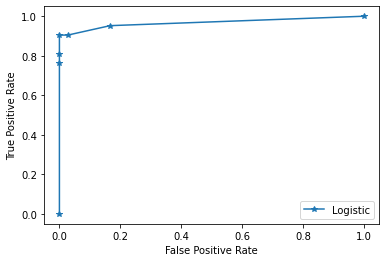

In [48]:
from sklearn.metrics import roc_auc_score, roc_curve
from matplotlib import pyplot


# predict probabilities
lr_probs = knn.predict_proba(dataTestFinal)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:,1]

# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)

# summarize scores
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the y_test
pyplot.plot(lr_fpr, lr_tpr, marker='*', label='Logistic')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [49]:
dataTestFinal[0].reshape(1,30)

array([[ 0.31413431,  1.42746499,  0.41400135,  0.20130564,  0.84066484,
         1.28151817,  1.02684216,  0.99800495,  0.41977418,  0.39629375,
         0.10743621, -0.36593786,  0.31205442,  0.05670386, -0.59221894,
         0.3222028 ,  0.16729218, -0.13629256, -0.32805658, -0.29558987,
         0.80830449,  1.82236846,  1.24139769,  0.65863156,  1.39289296,
         2.34636372,  1.85107418,  1.35133937,  1.84882563,  0.85009035]])

In [50]:
lb.inverse_transform(lr.predict(dataTestFinal[0].reshape(1,30)))

array(['M'], dtype='<U1')

# XGBoost

In [51]:
import warnings
warnings.filterwarnings('ignore')

In [52]:
prm_xgb = {
    'booster': 'gbtree',
    'objective': 'binary:logistic',
    'max_depth': 100,
    'learning_rate': 0.1,
    'eval_metric': 'rmse',
}

In [53]:
import xgboost as xgb
dt_xgb   = xgb.DMatrix(dataTrainFinal, y_train)
dv_xgb   = xgb.DMatrix(dataTestFinal, y_test)

In [54]:
obj_xgb = xgb.train(
    prm_xgb, dt_xgb, 1000,
    [(dt_xgb, 'train'), (dv_xgb, 'valid')])

[0]	train-rmse:0.45632	valid-rmse:0.46166
[1]	train-rmse:0.41632	valid-rmse:0.42473
[2]	train-rmse:0.38050	valid-rmse:0.39127
[3]	train-rmse:0.34890	valid-rmse:0.36568
[4]	train-rmse:0.31972	valid-rmse:0.34089
[5]	train-rmse:0.29502	valid-rmse:0.32263
[6]	train-rmse:0.27174	valid-rmse:0.30692
[7]	train-rmse:0.25116	valid-rmse:0.29418
[8]	train-rmse:0.23221	valid-rmse:0.28086
[9]	train-rmse:0.21530	valid-rmse:0.27046
[10]	train-rmse:0.20048	valid-rmse:0.26279
[11]	train-rmse:0.18635	valid-rmse:0.25268
[12]	train-rmse:0.17468	valid-rmse:0.24627
[13]	train-rmse:0.16308	valid-rmse:0.23730
[14]	train-rmse:0.15366	valid-rmse:0.23445
[15]	train-rmse:0.14428	valid-rmse:0.22734
[16]	train-rmse:0.13672	valid-rmse:0.22696
[17]	train-rmse:0.12937	valid-rmse:0.22174
[18]	train-rmse:0.12237	valid-rmse:0.21756
[19]	train-rmse:0.11661	valid-rmse:0.21577
[20]	train-rmse:0.11105	valid-rmse:0.21274
[21]	train-rmse:0.10619	valid-rmse:0.21421
[22]	train-rmse:0.10181	valid-rmse:0.21010
[23]	train-rmse:0.098

[189]	train-rmse:0.01698	valid-rmse:0.20595
[190]	train-rmse:0.01697	valid-rmse:0.20565
[191]	train-rmse:0.01694	valid-rmse:0.20604
[192]	train-rmse:0.01692	valid-rmse:0.20560
[193]	train-rmse:0.01682	valid-rmse:0.20562
[194]	train-rmse:0.01677	valid-rmse:0.20560
[195]	train-rmse:0.01681	valid-rmse:0.20539
[196]	train-rmse:0.01681	valid-rmse:0.20527
[197]	train-rmse:0.01672	valid-rmse:0.20528
[198]	train-rmse:0.01670	valid-rmse:0.20538
[199]	train-rmse:0.01668	valid-rmse:0.20497
[200]	train-rmse:0.01666	valid-rmse:0.20535
[201]	train-rmse:0.01658	valid-rmse:0.20523
[202]	train-rmse:0.01657	valid-rmse:0.20494
[203]	train-rmse:0.01662	valid-rmse:0.20500
[204]	train-rmse:0.01659	valid-rmse:0.20537
[205]	train-rmse:0.01650	valid-rmse:0.20539
[206]	train-rmse:0.01650	valid-rmse:0.20527
[207]	train-rmse:0.01648	valid-rmse:0.20486
[208]	train-rmse:0.01647	valid-rmse:0.20496
[209]	train-rmse:0.01640	valid-rmse:0.20485
[210]	train-rmse:0.01641	valid-rmse:0.20494
[211]	train-rmse:0.01632	valid-r

[376]	train-rmse:0.01336	valid-rmse:0.20578
[377]	train-rmse:0.01335	valid-rmse:0.20583
[378]	train-rmse:0.01335	valid-rmse:0.20563
[379]	train-rmse:0.01334	valid-rmse:0.20572
[380]	train-rmse:0.01334	valid-rmse:0.20572
[381]	train-rmse:0.01331	valid-rmse:0.20564
[382]	train-rmse:0.01330	valid-rmse:0.20569
[383]	train-rmse:0.01332	valid-rmse:0.20575
[384]	train-rmse:0.01329	valid-rmse:0.20593
[385]	train-rmse:0.01329	valid-rmse:0.20593
[386]	train-rmse:0.01328	valid-rmse:0.20597
[387]	train-rmse:0.01328	valid-rmse:0.20577
[388]	train-rmse:0.01324	valid-rmse:0.20595
[389]	train-rmse:0.01324	valid-rmse:0.20595
[390]	train-rmse:0.01327	valid-rmse:0.20600
[391]	train-rmse:0.01326	valid-rmse:0.20604
[392]	train-rmse:0.01322	valid-rmse:0.20623
[393]	train-rmse:0.01322	valid-rmse:0.20603
[394]	train-rmse:0.01322	valid-rmse:0.20602
[395]	train-rmse:0.01321	valid-rmse:0.20606
[396]	train-rmse:0.01317	valid-rmse:0.20624
[397]	train-rmse:0.01320	valid-rmse:0.20629
[398]	train-rmse:0.01320	valid-r

[563]	train-rmse:0.01252	valid-rmse:0.20299
[564]	train-rmse:0.01252	valid-rmse:0.20299
[565]	train-rmse:0.01252	valid-rmse:0.20299
[566]	train-rmse:0.01252	valid-rmse:0.20299
[567]	train-rmse:0.01252	valid-rmse:0.20299
[568]	train-rmse:0.01252	valid-rmse:0.20299
[569]	train-rmse:0.01252	valid-rmse:0.20299
[570]	train-rmse:0.01252	valid-rmse:0.20299
[571]	train-rmse:0.01252	valid-rmse:0.20299
[572]	train-rmse:0.01252	valid-rmse:0.20299
[573]	train-rmse:0.01252	valid-rmse:0.20299
[574]	train-rmse:0.01252	valid-rmse:0.20299
[575]	train-rmse:0.01252	valid-rmse:0.20299
[576]	train-rmse:0.01252	valid-rmse:0.20299
[577]	train-rmse:0.01252	valid-rmse:0.20299
[578]	train-rmse:0.01252	valid-rmse:0.20299
[579]	train-rmse:0.01252	valid-rmse:0.20299
[580]	train-rmse:0.01252	valid-rmse:0.20299
[581]	train-rmse:0.01252	valid-rmse:0.20299
[582]	train-rmse:0.01252	valid-rmse:0.20299
[583]	train-rmse:0.01252	valid-rmse:0.20299
[584]	train-rmse:0.01252	valid-rmse:0.20299
[585]	train-rmse:0.01252	valid-r

[750]	train-rmse:0.01252	valid-rmse:0.20299
[751]	train-rmse:0.01252	valid-rmse:0.20299
[752]	train-rmse:0.01252	valid-rmse:0.20299
[753]	train-rmse:0.01252	valid-rmse:0.20299
[754]	train-rmse:0.01252	valid-rmse:0.20299
[755]	train-rmse:0.01252	valid-rmse:0.20299
[756]	train-rmse:0.01252	valid-rmse:0.20299
[757]	train-rmse:0.01252	valid-rmse:0.20299
[758]	train-rmse:0.01252	valid-rmse:0.20299
[759]	train-rmse:0.01252	valid-rmse:0.20299
[760]	train-rmse:0.01252	valid-rmse:0.20299
[761]	train-rmse:0.01252	valid-rmse:0.20299
[762]	train-rmse:0.01252	valid-rmse:0.20299
[763]	train-rmse:0.01252	valid-rmse:0.20299
[764]	train-rmse:0.01252	valid-rmse:0.20299
[765]	train-rmse:0.01252	valid-rmse:0.20299
[766]	train-rmse:0.01252	valid-rmse:0.20299
[767]	train-rmse:0.01252	valid-rmse:0.20299
[768]	train-rmse:0.01252	valid-rmse:0.20299
[769]	train-rmse:0.01252	valid-rmse:0.20299
[770]	train-rmse:0.01252	valid-rmse:0.20299
[771]	train-rmse:0.01252	valid-rmse:0.20299
[772]	train-rmse:0.01252	valid-r

[937]	train-rmse:0.01252	valid-rmse:0.20299
[938]	train-rmse:0.01252	valid-rmse:0.20299
[939]	train-rmse:0.01252	valid-rmse:0.20299
[940]	train-rmse:0.01252	valid-rmse:0.20299
[941]	train-rmse:0.01252	valid-rmse:0.20299
[942]	train-rmse:0.01252	valid-rmse:0.20299
[943]	train-rmse:0.01252	valid-rmse:0.20299
[944]	train-rmse:0.01252	valid-rmse:0.20299
[945]	train-rmse:0.01252	valid-rmse:0.20299
[946]	train-rmse:0.01252	valid-rmse:0.20299
[947]	train-rmse:0.01252	valid-rmse:0.20299
[948]	train-rmse:0.01252	valid-rmse:0.20299
[949]	train-rmse:0.01252	valid-rmse:0.20299
[950]	train-rmse:0.01252	valid-rmse:0.20299
[951]	train-rmse:0.01252	valid-rmse:0.20299
[952]	train-rmse:0.01252	valid-rmse:0.20299
[953]	train-rmse:0.01252	valid-rmse:0.20299
[954]	train-rmse:0.01252	valid-rmse:0.20299
[955]	train-rmse:0.01252	valid-rmse:0.20299
[956]	train-rmse:0.01252	valid-rmse:0.20299
[957]	train-rmse:0.01252	valid-rmse:0.20299
[958]	train-rmse:0.01252	valid-rmse:0.20299
[959]	train-rmse:0.01252	valid-r

In [55]:
pred_proba = obj_xgb.predict(dv_xgb)

In [56]:
predictionsXGB = np.where(pred_proba > 0.5, 1, 0)

In [57]:
# Find All Scores for XGBoost

print("precision score: ", precision_score(predictionsXGB, y_test))
print("recall score: ", recall_score(predictionsXGB, y_test))
print("f1 score: ", f1_score(predictionsXGB, y_test))
print("accuracy score: ", accuracy_score(predictionsXGB, y_test))

precision score:  0.8571428571428571
recall score:  1.0
f1 score:  0.923076923076923
accuracy score:  0.9473684210526315


# LightGBM

In [58]:
prm_lgb = {
                        'task': 'train',
                        'boosting': 'goss',
                        'objective': 'binary',
                        'metric': 'rmse',
                        'learning_rate': 0.01,
                        'max_depth': 100
                        }

In [59]:
import lightgbm as lgb
dt_lgb   = lgb.Dataset(dataTrainFinal, y_train[:, 0])
dv_lgb   = lgb.Dataset(dataTestFinal, y_test[:, 0], reference=dt_lgb)

In [60]:
obj_lgb = lgb.train(
    prm_lgb, dt_lgb, num_boost_round=1000,
    valid_sets=dv_lgb)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 191, number of negative: 321
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001151 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5121
[LightGBM] [Info] Number of data points in the train set: 512, number of used features: 30
[LightGBM] [Info] Using GOSS
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.373047 -> initscore=-0.519168
[LightGBM] [Info] Start training from score -0.519168
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's r

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[90]	valid_0's rmse: 0.286053
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[91]	valid_0's rmse: 0.284691
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[92]	valid_0's rmse: 0.283516
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[93]	valid_0's rmse: 0.282502
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[94]	valid_0's rmse: 0.281363
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[95]	valid_0's rmse: 0.280468
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[96]	valid_0's rmse: 0.279357
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[97]	valid_0's rmse: 0.278041
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[98]	valid_0's rmse: 0.277328
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[240]	valid_0's rmse: 0.217597
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[241]	valid_0's rmse: 0.217406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[242]	valid_0's rmse: 0.21763
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[243]	valid_0's rmse: 0.217559
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[244]	valid_0's rmse: 0.217697
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[245]	valid_0's rmse: 0.21745
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[246]	valid_0's rmse: 0.21746
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[247]	valid_0's rmse: 0.217578
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[248]	valid_0's rmse: 0.217163
[LightGBM] [Warning] No further splits with posit

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[404]	valid_0's rmse: 0.219652
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[405]	valid_0's rmse: 0.219905
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[406]	valid_0's rmse: 0.219993
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[407]	valid_0's rmse: 0.220194
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[408]	valid_0's rmse: 0.220589
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[409]	valid_0's rmse: 0.220725
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[410]	valid_0's rmse: 0.221006
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[411]	valid_0's rmse: 0.221299
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[412]	valid_0's rmse: 0.221204
[LightGBM] [Warning] No further splits with po

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[547]	valid_0's rmse: 0.231618
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[548]	valid_0's rmse: 0.231831
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[549]	valid_0's rmse: 0.232016
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[550]	valid_0's rmse: 0.232196
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[551]	valid_0's rmse: 0.232319
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[552]	valid_0's rmse: 0.232125
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[553]	valid_0's rmse: 0.23236
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[554]	valid_0's rmse: 0.232281
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[555]	valid_0's rmse: 0.232255
[LightGBM] [Warning] No further splits with pos

[707]	valid_0's rmse: 0.241299
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[708]	valid_0's rmse: 0.241511
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[709]	valid_0's rmse: 0.241568
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[710]	valid_0's rmse: 0.241669
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[711]	valid_0's rmse: 0.241922
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[712]	valid_0's rmse: 0.241917
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[713]	valid_0's rmse: 0.241953
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[714]	valid_0's rmse: 0.242148
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[715]	valid_0's rmse: 0.242241
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[716]	valid_0's rmse: 0.242185
[LightGBM] [War

[859]	valid_0's rmse: 0.247583
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[860]	valid_0's rmse: 0.247593
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[861]	valid_0's rmse: 0.247819
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[862]	valid_0's rmse: 0.24791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[863]	valid_0's rmse: 0.247814
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[864]	valid_0's rmse: 0.247757
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[865]	valid_0's rmse: 0.247767
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[866]	valid_0's rmse: 0.247899
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[867]	valid_0's rmse: 0.247758
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[868]	valid_0's rmse: 0.247623
[LightGBM] [Warn

In [61]:
pred_proba = obj_lgb.predict(dataTestFinal)

In [62]:
pred = np.where(pred_proba > 0.5, 1, 0)

In [63]:
# Find All Scores for Light GBM

print("precision score: ", precision_score(pred, y_test))
print("recall score: ", recall_score(pred, y_test))
print("f1 score: ", f1_score(pred, y_test))
print("accuracy score: ", accuracy_score(pred, y_test))

precision score:  0.7619047619047619
recall score:  1.0
f1 score:  0.8648648648648648
accuracy score:  0.9122807017543859


# K - Fold Cross Validation

In [101]:
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedStratifiedKFold

In [90]:
kf = KFold(n_splits=50, shuffle=True, random_state=42)

In [91]:
y = lb.fit_transform(y)

In [97]:
precision_scores = []
recall_scores = []
#X = X.to_numpy()
#y = y.to_numpy()
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    lr.fit(X_train, y_train)
    precision_scores.append(
        precision_score(lr.predict(X_test), y_test)
    )
    recall_scores.append(
        recall_score(lr.predict(X_test), y_test)
    )
print("Precision Score:  ", np.mean(precision_scores), "\n\nRecall Score:  ", np.mean(recall_scores))

Precision Score:   0.910142857142857 

Recall Score:   0.9399285714285714


# Stratified K-Fold Cross Validation

In [98]:
kf = StratifiedKFold(n_splits=50, shuffle=True, random_state=42)

In [100]:
precision_scores = []
recall_scores = []
#X = X.to_numpy()
#y = y.to_numpy()
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    lr.fit(X_train, y_train)
    precision_scores.append(
        precision_score(lr.predict(X_test), y_test)
    )
    recall_scores.append(
        recall_score(lr.predict(X_test), y_test)
    )
print("Precision Score:  ", np.mean(precision_scores), "\n\nRecall Score:  ", np.mean(recall_scores))

Precision Score:   0.912 

Recall Score:   0.9486666666666668


# Repeated Stratified K-Fold Cross Validation

In [103]:
kf = RepeatedStratifiedKFold(n_splits=50, random_state=42)

In [105]:
from sklearn.metrics import mean_squared_error

In [106]:
precision_scores = []
recall_scores = []
rmse = []
#X = X.to_numpy()
#y = y.to_numpy()
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    lr.fit(X_train, y_train)
    precision_scores.append(
        precision_score(lr.predict(X_test), y_test)
    )
    recall_scores.append(
        recall_score(lr.predict(X_test), y_test)
    )
    rmse.append(
        np.sqrt(mean_squared_error(lr.predict(X_test), y_test))
    )
print("Precision Score:  ", np.mean(precision_scores), "\n\nRecall Score:  ", np.mean(recall_scores),
      "\n\nRMSE:  ", np.mean(rmse))

Precision Score:   0.9097000000000001 

Recall Score:   0.9481285714285714 

RMSE:   0.16173121634912427


# Hyperparameter Tuning - Grid Search

In [208]:
tuned_parameters_lr = [{'penalty': ['l1', 'l2'], 
                     'C': [0.1,0.001, 0.0001, 0.05, 0.2, 0.5, 0.3],
                     'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}]

In [209]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [210]:
clf = GridSearchCV(LogisticRegression(), tuned_parameters_lr, cv=5,
                       scoring='recall')

In [211]:
import time
timeStart = time.time()
clf.fit(dataTrainFinal, y_train)
timeEnd = time.time()
print("Time Taken: ", (timeEnd - timeStart))

Time Taken:  2.7963600158691406


In [192]:
print(clf.best_params_)

{'C': 0.05, 'penalty': 'l2', 'solver': 'liblinear'}


In [193]:
predictionsHPT = clf.predict(dataTestFinal)

In [194]:
# Find All Scores for LR - HP Tuned

print("precision score: ", precision_score(predictionsHPT, y_test))
print("recall score: ", recall_score(predictionsHPT, y_test))
print("f1 score: ", f1_score(predictionsHPT, y_test))
print("accuracy score: ", accuracy_score(predictionsHPT, y_test))

precision score:  0.9523809523809523
recall score:  1.0
f1 score:  0.975609756097561
accuracy score:  0.9824561403508771


# Hyperparameter Tuning - Random Search

In [195]:
tuned_parameters_lr = [{'penalty': ['l1', 'l2'], 
                     'C': [0.1,0.001, 0.0001, 0.05, 0.2, 0.5, 0.3],
                     'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}]

In [196]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

In [202]:
clf = RandomizedSearchCV(LogisticRegression(), tuned_parameters_lr, cv=5,
                       scoring='recall')

In [207]:
import time
timeStart = time.time()
clf.fit(dataTrainFinal, y_train)
timeEnd = time.time()
print("Time Taken: ", (timeEnd - timeStart))

Time Taken:  0.4567539691925049


In [204]:
print(clf.best_params_)

{'solver': 'liblinear', 'penalty': 'l1', 'C': 0.1}


In [205]:
predictionsHPT = clf.predict(dataTestFinal)

In [206]:
# Find All Scores for LR - HP Tuned

print("precision score: ", precision_score(predictionsHPT, y_test))
print("recall score: ", recall_score(predictionsHPT, y_test))
print("f1 score: ", f1_score(predictionsHPT, y_test))
print("accuracy score: ", accuracy_score(predictionsHPT, y_test))

precision score:  0.9047619047619048
recall score:  1.0
f1 score:  0.9500000000000001
accuracy score:  0.9649122807017544


# Hyperparameter Tuning - Grid Search - GNB

In [212]:
tuned_parameters_gnb = [{'var_smoothing': [1e-09, 2e-09, 3e-09, 4e-09, 5e-09, 1e-08 ,1e-07, 1e-06 ,1e-11 , 1e-10]}]

In [213]:
clf = GridSearchCV(GaussianNB(), tuned_parameters_gnb, cv=5,
                       scoring='recall')

In [214]:
import time
timeStart = time.time()
clf.fit(dataTrainFinal, y_train)
timeEnd = time.time()
print("Time Taken: ", (timeEnd - timeStart))

Time Taken:  0.20217609405517578


In [215]:
print(clf.best_params_)

{'var_smoothing': 1e-09}


In [216]:
predictionsHPT = clf.predict(dataTestFinal)

In [217]:
# Find All Scores for LR - HP Tuned

print("precision score: ", precision_score(predictionsHPT, y_test))
print("recall score: ", recall_score(predictionsHPT, y_test))
print("f1 score: ", f1_score(predictionsHPT, y_test))
print("accuracy score: ", accuracy_score(predictionsHPT, y_test))

precision score:  0.8095238095238095
recall score:  0.8947368421052632
f1 score:  0.8500000000000001
accuracy score:  0.8947368421052632


# Feature Importance

### Score Based Method

#### Correlation Based

In [230]:
cancerData['diagnosis'] = lb.fit_transform(cancerData['diagnosis'])

In [233]:
cancerData.corr(method="kendall")['diagnosis']

diagnosis                  1.000000
radius_mean                0.599082
texture_mean               0.377644
perimeter_mean             0.611775
area_mean                  0.599992
smoothness_mean            0.304033
compactness_mean           0.497971
concavity_mean             0.599449
concave points_mean        0.635873
symmetry_mean              0.271924
fractal_dimension_mean    -0.021173
radius_se                  0.504197
texture_se                 0.015872
perimeter_se               0.515243
area_se                    0.583722
smoothness_se             -0.042656
compactness_se             0.311115
concavity_se               0.384486
concave points_se          0.399546
symmetry_se               -0.075451
fractal_dimension_se       0.164674
radius_worst               0.644195
texture_worst              0.389654
perimeter_worst            0.650879
area_worst                 0.643117
smoothness_worst           0.347952
compactness_worst          0.495958
concavity_worst            0

#### Anova Test

In [234]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

In [235]:
fs = SelectKBest(score_func=f_classif, k='all')

In [236]:
fs.fit(dataTrainFinal, y_train)

SelectKBest(k='all')

In [237]:
X_fs = fs.transform(dataTrainFinal)

In [238]:
fs.scores_

array([5.69404418e+02, 1.10489246e+02, 6.10947283e+02, 5.03467727e+02,
       7.22418797e+01, 2.69338831e+02, 4.83552043e+02, 7.49953832e+02,
       5.26651379e+01, 3.04751747e-01, 2.34800987e+02, 9.89399471e-02,
       2.20815346e+02, 2.10735046e+02, 1.86264250e+00, 4.68418461e+01,
       3.96964804e+01, 1.05244451e+02, 1.86614113e-01, 2.31369123e+00,
       7.60639411e+02, 1.40185566e+02, 7.86966700e+02, 5.79818014e+02,
       1.11479813e+02, 2.75286467e+02, 4.42538042e+02, 8.85030858e+02,
       1.00219278e+02, 5.67505966e+01])

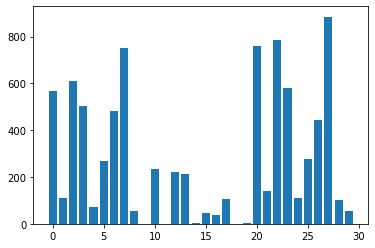

In [240]:
import warnings
warnings.filterwarnings('ignore')
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()